<a href="https://colab.research.google.com/github/Tomas-Ausensi/Entregables_MAT281/blob/master/docs/labs/lab_6_tomas_ausensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1iLbdUKIrQByZ_yJFKOonV2VK4UL1aMvA" width = "400" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 10


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

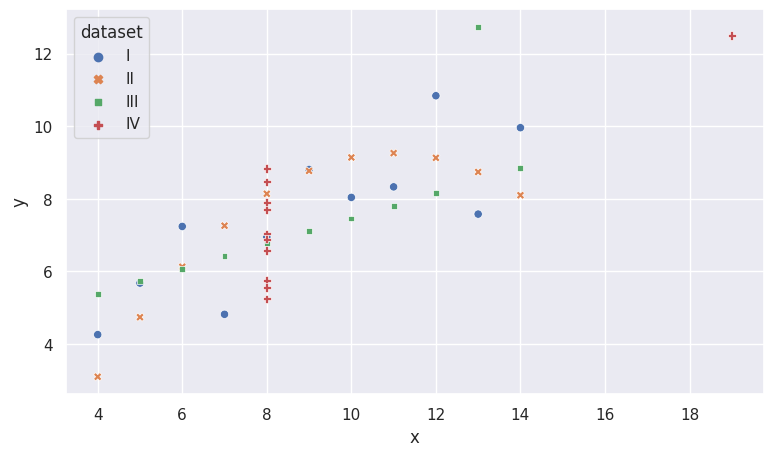

In [3]:
plt.figure(figsize=(9,5))
sns.set_style("darkgrid")
sns.scatterplot(
    data = data,
    x = 'x',
    y = 'y',
    hue = 'dataset',
    style = 'dataset'
    )
plt.show()

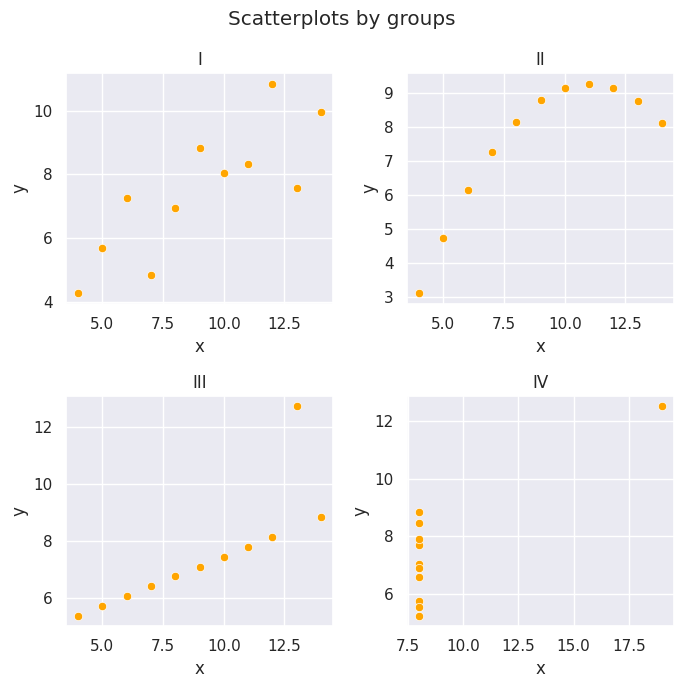

In [4]:
fig, axes = plt.subplots(2,2, figsize =(7,7))
for index, group in enumerate(data['dataset'].unique()):
  sns.scatterplot(
      data= data[data['dataset'] == group],
      x= 'x',
      y= 'y',
      ax = axes[index//2,index%2],
      color = 'orange'
  )
  axes[index//2,index%2].set_title(f'{group}')
fig.suptitle('Scatterplots by groups')
fig.tight_layout()
plt.show()

Como se puede apreciar, hay una diferencia notable entre cada uno de los grupos.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando `describe` para cada grupo. Interprete.

In [5]:
data.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

Al ver las estadísticas de cada grupo, es interesante notar que son bastante **similares** entre sí, a pesar de la diferencia visual que se observó al inicio. Una conclusión apresurada, sin las visualizaciones, sería decir que los grupos son prácticamente iguales, lo cual no es cierto.

3. Realice un ajuste lineal (con **sklearn**) y calcule los resultados de las métricas para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [6]:
#Model
model = LinearRegression()

In [7]:
#Empty dataframes.
data2 = pd.DataFrame()
metrics_df = pd.DataFrame()

#Training for each group in the dataset
for group in data['dataset'].unique():

  #Filtering the data set by group

  filtered_df = data[data['dataset'] == group]
  index_column = data[data['dataset'] == group].index

  #data split

  X = filtered_df['x']
  y = filtered_df['y']

  #model training

  model.fit(X.values.reshape(-1,1),y.values)

  #predictions

  y_hat = model.predict(X.values.reshape(-1,1))

  #new dataset

  d = {'dataset' : group, 'x' : X.values, 'y' : y.values, 'y_hat': y_hat}
  df = pd.DataFrame(data = d)
  df.index = index_column
  data2 = pd.concat([data2, df], axis = 0)

  #metrics (consideradas en la página del profesor)

  results = pd.DataFrame()
  results['mae'] = [round(mean_absolute_error(y.values, y_hat), 4)]
  results['mse'] = [round(mean_squared_error(y.values, y_hat), 4)]
  results['rmse'] = [round(np.sqrt(mean_squared_error(y.values, y_hat)), 4)]
  results['mape'] = [round(mean_absolute_percentage_error(y.values, y_hat), 4)]
  results['smape'] = [round(2 * mean_absolute_percentage_error(y.values, y_hat) / (mean_absolute_percentage_error(y.values, y_hat) + 100), 4)]
  results['r2'] =  round(r2_score(y.values, y_hat), 4)
  results.index = [group]
  metrics_df = pd.concat([metrics_df, results])

In [8]:
data2.head()

,dataset,x,y,y_hat
0,I,10.0,8.04,8.001000
1,I,8.0,6.95,7.000818
2,I,13.0,7.58,9.501273
3,I,9.0,8.81,7.500909
4,I,11.0,8.33,8.501091


In [9]:
metrics_df

,mae,mse,rmse,mape,smape,r2
I,0.8374,1.2512,1.1185,1.2126,0.0240,0.6665
II,0.9679,1.2524,1.1191,1.5695,0.0309,0.6662
III,0.7160,1.2506,1.1183,0.7971,0.0158,0.6663
IV,0.9027,1.2493,1.1177,1.3474,0.0266,0.6667


`metrics_df` permite corroborar la similitud estadística entre los distintos grupos al realizar el ajuste lineal.

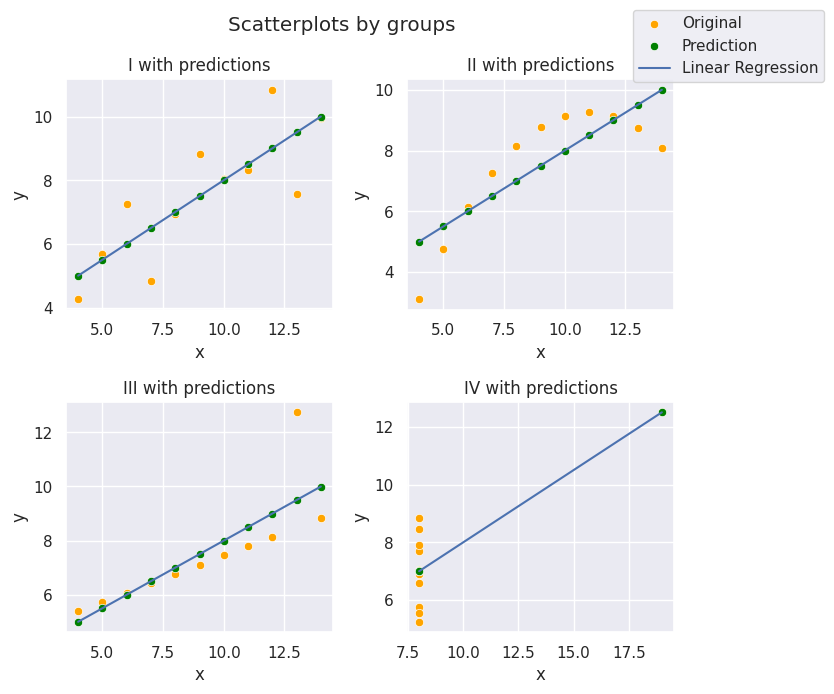

In [10]:
#Subplots

fig, axes = plt.subplots(2,2, figsize =(7,7))

#Plotting for each group
for index, group in enumerate(data2['dataset'].unique()):

  #filtering the data set by group

  data = data2[data2['dataset'] == group]

  #scatterplot for original data

  sns.scatterplot(

      data= data,
      x= 'x',
      y= 'y',
      ax = axes[index//2,index%2],
      color = 'orange',
  )

  #scatterplot for predicted data (in the same plot)

  sns.scatterplot(

      data= data,
      x= 'x',
      y= 'y_hat',
      ax = axes[index//2,index%2],
      color = 'green',
  )
  #finding minimum and maximum points by x values for plotting regression line
  #filtering minimum and maximum in the dataframe

  minimum = data[data['x'] == data['x'].min()]
  maximum = data[data['x'] == data['x'].max()]

  #minimum and maximum will be the only row in the dataframe
  x_min, y_min = minimum['x'].iloc[0], minimum['y_hat'].iloc[0]
  x_max, y_max = maximum['x'].iloc[0], maximum['y_hat'].iloc[0]

  #title and regression line
  axes[index//2,index%2].set_title(f'{group} with predictions')
  axes[index//2,index%2].plot([x_min,x_max] , [y_min,y_max])


fig.suptitle('Scatterplots by groups')
fig.tight_layout()
legend_labels = ['Original', 'Prediction', 'Linear Regression']
fig.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.20, 1))
plt.show()


4. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

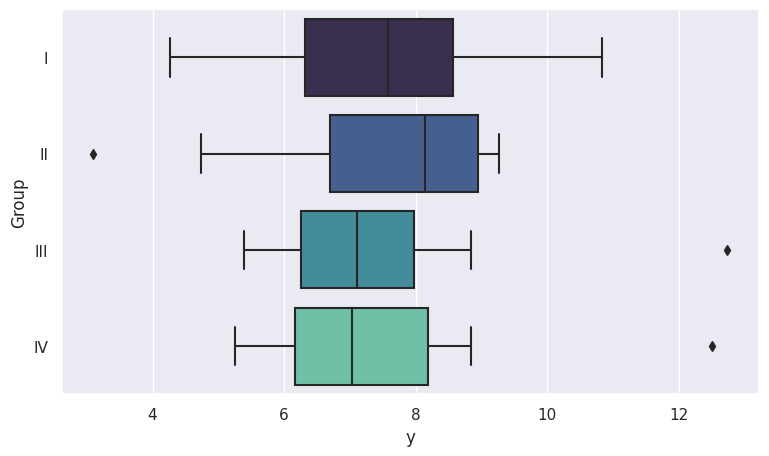

In [11]:
plt.figure(figsize=(9,5))
sns.boxplot(
    data = data2,
    x = 'y',
    y = 'dataset',
    palette = 'mako'
)
plt.ylabel('Group')
plt.show()

Con el gráfico de bigotes, podemos identificar los *outliers* de cada grupo. Ahora, de acuerdo a la visualización, la estrategia de eliminar outliers solo funciona bien con el tercer grupo, puesto que para el segundo tenemos otro tipo de comportamiento en los datos, y en el cuarto es un tema de *labeling* de los ejes.

A modo de ejemplo, veamos el grupo 3

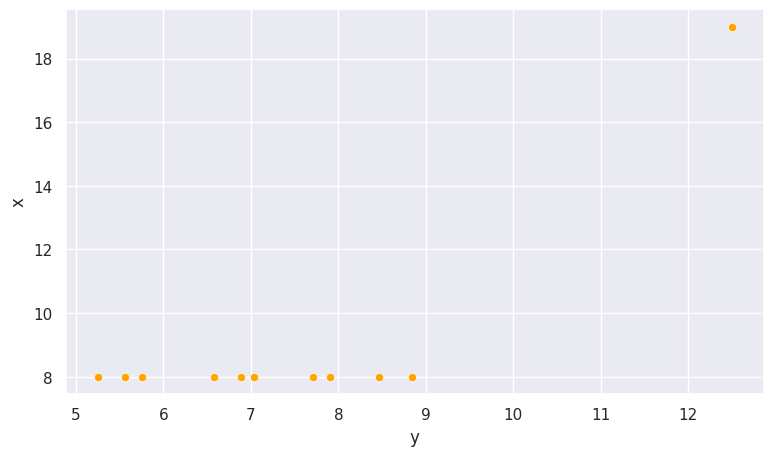

In [12]:
plt.figure(figsize=(9,5))
sns.scatterplot(
    data = data2[data2['dataset'] == 'IV'],
    x= 'y',
    y = 'x',
    color = 'orange'
)
plt.show()

La posible interpretación es que ahora si se puede eliminar el *outlier* y el resto de datos tendrían un comportamiento constante

Ahora, para el segundo grupo, un comportamiento que podría ajustar bien los datos es *cuadrático*, para ello:

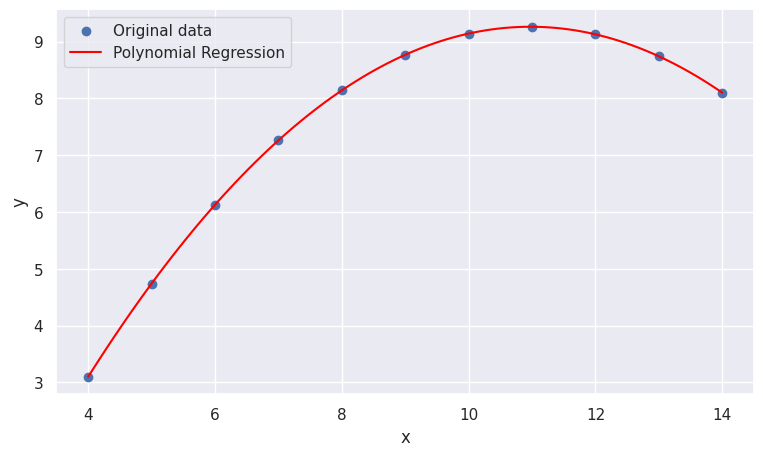

In [13]:
#Obtaining the data
filtered_df = data2[data2['dataset'] == "II"]
x = filtered_df['x'].values
y = filtered_df['y'].values

#Polynomial regression
coeffs = np.polyfit(x, y, 2)
poly = np.poly1d(coeffs)

#grid for the polynomial
x_range = np.linspace(min(x), max(x), 100)
y_range = poly(x_range)

plt.figure(figsize=(9,5))
#plotting the data of group II
plt.scatter(x,y, label = 'Original data')

#plotting the data for the polynomial regression
plt.plot(x_range, y_range, color = 'red', label = 'Polynomial Regression')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.grid(visible = True)
plt.show()

De esa forma, las estrategias que pueden resultar útiles:
- grupo II: Ajustar otro modelo
- grupo III: Eliminar outliers
- grupo IV: Cambiar etiquetado y eliminar outliers